importing dependencies

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection

In [16]:
dataset=pd.read_csv("diabetes.csv")

data preprocessing

In [12]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
dataset.shape

(768, 9)

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               2
SkinThickness               0
Insulin                     0
BMI                         3
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='BloodPressure', ylabel='Count'>

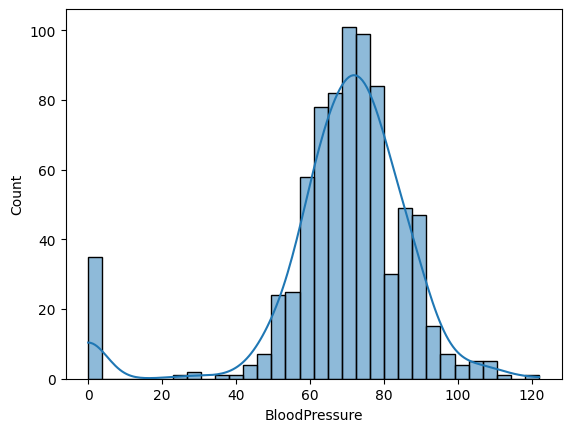

In [24]:
sns.histplot(dataset['BloodPressure'],kde=True)

In [30]:
dataset['BloodPressure'].fillna(dataset['BloodPressure'].median(),inplace=True)#fillna is used to fill missing values

TypeError: 'NoneType' object is not subscriptable

In [31]:
print(type(dataset))


<class 'NoneType'>


In [34]:
dataset=pd.read_csv('diabetes.csv')

In [35]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               2
SkinThickness               0
Insulin                     0
BMI                         3
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
dataset['BloodPressure'].fillna(dataset['BloodPressure'].median(),inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_4484\3219738339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['BloodPressure'].fillna(dataset['BloodPressure'].median(),inplace=True)


In [37]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         3
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='BMI', ylabel='Count'>

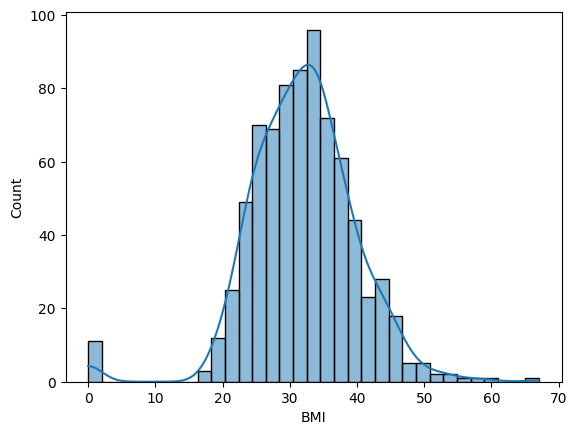

In [38]:
sns.histplot(dataset['BMI'],kde=True)

In [39]:
dataset['BMI'].fillna(dataset['BMI'].median(),inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_4484\1199864524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['BMI'].fillna(dataset['BMI'].median(),inplace=True)


In [40]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [53]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.160000,19.664000,68.792000,30.302800,0.429734,31.190000
1,4.865672,141.257463,70.794776,22.164179,100.335821,35.148134,0.550500,37.067164


In [55]:
x=dataset.drop(columns='Outcome',axis=1)
y=dataset['Outcome']

In [56]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35        0  33.6   
1              1       85           66.0             29        0  26.6   
2              8      183           64.0              0        0  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48      180  32.9   
764            2      122           70.0             27        0  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0              0        0  30.1   
767            1       93           70.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [57]:
x.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.344882
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.879396
DiabetesPedigreeFunction      0.331329
Age                          11.760232
dtype: float64

In [58]:
scaler=StandardScaler()

In [59]:
scaler.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [60]:
x_standardised=scaler.transform(x)

In [63]:
x=x_standardised

In [64]:
print(x.std())

0.9999999999999999


In [68]:
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [69]:
classifier=svm.SVC(kernel='linear')

In [71]:
classifier.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
x_train_prediction=classifier.predict(x_train)
train_predicted_accuracy=accuracy_score(x_train_prediction,y_train)
print(train_predicted_accuracy)

0.7850162866449512


In [73]:
x_test_prediction=classifier.predict(x_test)
test_predicted_accuracy=accuracy_score(x_test_prediction,y_test)
print(test_predicted_accuracy)

0.7727272727272727


In [74]:
#making prdictive system 
input=(5,117,92,0,0,34.1,0.337,38)
input_data_as_numpy=np.asarray(input)
input_data_reshaped=input_data_as_numpy.reshape(1,-1)



In [75]:
print(input_data_reshaped)

[[  5.    117.     92.      0.      0.     34.1     0.337  38.   ]]


In [76]:
std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.3429808  -0.12188771  1.18561126 -1.28821221 -0.69289057  0.26750185
  -0.40734244  0.40494237]]


c:\Users\kumar\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
prediction=classifier.predict(std_data)
print(prediction)

[0]


In [78]:
if prediction[0]==0:
    print("patient is not diabetic")
else:
    print("patient iis diabete")

patient is not diabetic
